In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kusumbasnet","key":"9a689485ce82138bdc8bbffbf90fe589"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d parnianmalekian/water-quality

  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 109MB/s]


In [ ]:
!unzip water-quality.zip

Archive:  water-quality.zip
  inflating: water_potability.csv    


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('water_potability.csv')

In [ ]:
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.Potability.unique()

array([0, 1])

In [ ]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Text(0.5, 1.0, 'Feature Potability Correlation')

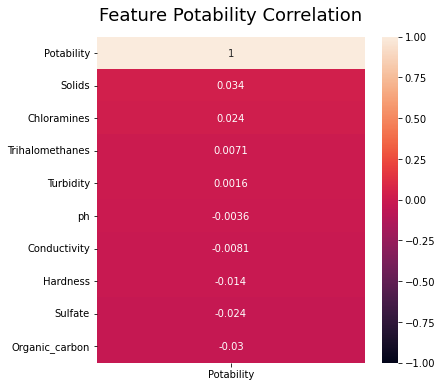

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(df.corr()[['Potability']].sort_values(by='Potability', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Feature Potability Correlation', fontdict={'fontsize':18}, pad=16)

In [ ]:
df.fillna(df.mean(), inplace = True) #filling in the missing values
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 0)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=20) 

In [ ]:
#df cols
x = pd.DataFrame(df, columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                                'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']).values
y = df['Potability'].values.reshape(-1, 1) #Target variable
x

array([[7.08079450e+00, 2.04890455e+02, 2.07913190e+04, ...,
        8.69909705e+01, 2.96313538e+00, 0.00000000e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        5.63290763e+01, 4.50065627e+00, 0.00000000e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        6.64200925e+01, 3.05593375e+00, 0.00000000e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        6.98454003e+01, 3.29887550e+00, 1.00000000e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        7.74882131e+01, 4.70865847e+00, 1.00000000e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        7.86984463e+01, 2.30914906e+00, 1.00000000e+00]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 0)

In [ ]:
from sklearn import metrics
K = 5
clf = KNeighborsClassifier(K)
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.5405405405405406


In [ ]:
K = 15
Acc = np.zeros((K))
for i in range(1, K+1):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train, y_train.ravel())
    y_pred = clf.predict(x_test)
    Acc[i-1] = metrics.accuracy_score(y_test, y_pred)
Acc

array([0.5440279 , 0.59808195, 0.55013078, 0.57279861, 0.54054054,
       0.5902354 , 0.57018309, 0.59982563, 0.59546643, 0.59459459,
       0.60331299, 0.60767219, 0.59808195, 0.61726242, 0.60767219])

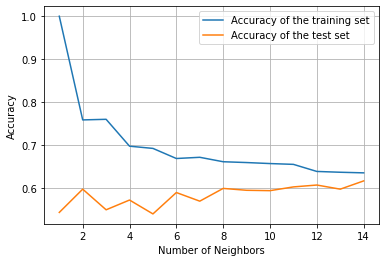

In [ ]:
training_acc = []
test_acc = []

# try KNN for different k nearest neighbor from 1 to 30
neighbors_setting = range(1, 15)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train.ravel())
    training_acc.append(knn.score(x_train, y_train))
    test_acc.append(knn.score(x_test, y_test))
plt.plot(neighbors_setting, training_acc, label = 'Accuracy of the training set')
plt.plot(neighbors_setting, test_acc, label = 'Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid(True)
plt.legend()
plt.show()  